In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm

In [2]:
width, height = 13, 2

In [3]:
pgf_with_latex = {
    # # LaTeX default is 10pt font.
    "text.usetex": True,
    # # setup matplotlib to use latex for output
    "pgf.texsystem": "xelatex",
    # use LaTeX to write all text
    "font.family": "DejaVu Sans",
    "font.serif": [],
    # # blank entries should cause plots to inherit fonts from the document
    # "font.sans-serif": [],
    # "font.monospace": [],
    'path.simplify': True,
    'path.simplify_threshold': 0.1,
    'legend.markerscale': .9,
    'legend.numpoints': 1,
    'legend.handlelength': 2,
    'legend.scatterpoints': 1,
    'legend.labelspacing': 0.5,
    'legend.facecolor': '#eff0f1',
    'legend.edgecolor': 'none',
    'legend.handletextpad': 0.5,  # pad between handle and text
    'legend.borderaxespad': 0.5,  # pad between legend and axes
    'legend.borderpad': 0.5,  # pad between legend and legend content
    'legend.columnspacing': 1,  # pad between each legend column
    'axes.spines.left': True,
    'axes.spines.top': True,
    'axes.titlesize': 'large',
    'axes.spines.bottom': True,
    'axes.spines.right': True,
    'axes.axisbelow': True,
    'axes.grid': True,
    'image.cmap': 'RdYlBu',
    'grid.linewidth': 0.5,
    'grid.linestyle': '-',
    'grid.alpha': .9,
    'lines.linewidth': 1,
    'lines.markersize': 4,
    'lines.markeredgewidth': 1,
    'pgf.preamble': [
        r'\usepackage[utf8x]{inputenc}',
        r'\usepackage[T1]{fontenc}',
        r'\usepackage{{{typeface}}}'
    ]
}
mpl.rcParams.update(pgf_with_latex)

# Trend

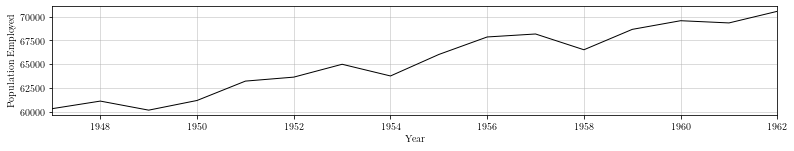

In [4]:
dta = sm.datasets.longley.load_pandas().data
dta.plot(x='YEAR', y='TOTEMP', figsize=(width, height), color='black', legend=None)
plt.ylabel('Population Employed')
plt.xlabel('Year')
plt.savefig('longley.pdf', bbox_inches='tight')

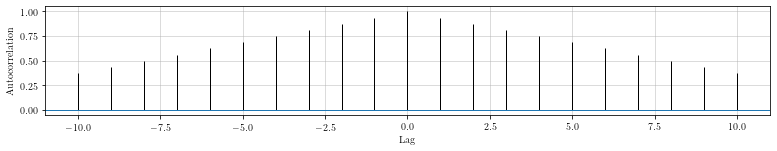

In [5]:
fig, ax1 = plt.subplots(1, 1, figsize=(width, height))
ax1.acorr(dta['TOTEMP'], usevlines=True)
plt.ylabel('Autocorrelation')
plt.xlabel('Lag')
plt.savefig('longleyacf.pdf', bbox_inches='tight')

# Cyclic

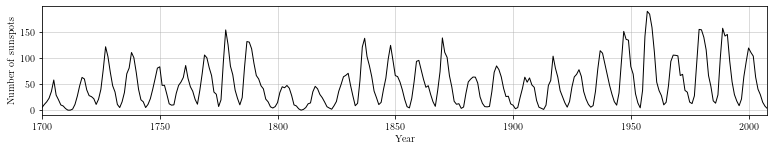

In [6]:
dta = sm.datasets.sunspots.load_pandas().data
dta.plot(x='YEAR', y='SUNACTIVITY', figsize=(width, height), color='black', legend=None)
plt.ylabel('Number of sunspots')
plt.xlabel('Year')
plt.savefig('sunspots.pdf', bbox_inches='tight')

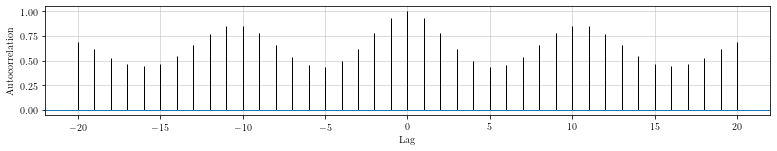

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(width, height))
ax1.acorr(dta['SUNACTIVITY'], usevlines=True, maxlags=20)
plt.ylabel('Autocorrelation')
plt.xlabel('Lag')
plt.savefig('sunspotsacf.pdf', bbox_inches='tight')

# Seasonality

/home/jader/Projects/git/meta_experiments/venv/lib/python3.7/site-packages/statsmodels/datasets/utils.py:185: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


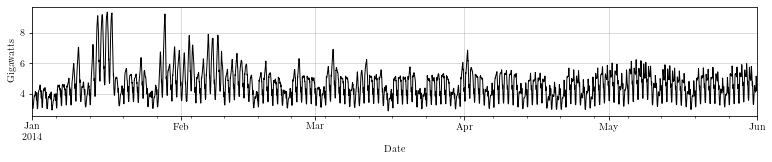

In [8]:
dta = sm.datasets.get_rdataset("elecdemand", "fpp2").data
dta.index = pd.Index(pd.date_range('2014-01-01 00:00:00', '2014-12-31 23:30:00', periods=17520))
dta = dta.loc[pd.date_range('2014-01-01', '2014-6-01', freq='30min')]
dta.plot(y='Demand', figsize=(width, height), color='black', legend=None)
plt.ylabel('Gigawatts')
plt.xlabel('Date')
plt.savefig('elec.pdf', bbox_inches='tight')

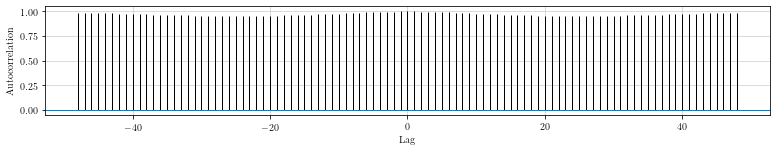

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=(width, height))
ax1.acorr(dta['Demand'], usevlines=True, maxlags=48)
plt.ylabel('Autocorrelation')
plt.xlabel('Lag')
plt.savefig('elecacf.pdf', bbox_inches='tight')